# Example of pandas boxplot

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0) # set random number seed (in order to make the run repeatable)

MAX = 500
BINS = 5
STEP = int(MAX/BINS)
SCALE = 200

# Build dataframe from x and y data
xx = [x for x in range(0, MAX)]
yy = [round(y + SCALE*np.random.rand(), 2) for y in range(0, MAX)]
di = {'X': xx, 'Y': yy}
df = pd.DataFrame.from_dict(di)
print(df.tail())

       X       Y
495  495  549.33
496  496  587.09
497  497  577.34
498  498  547.68
499  499  600.17


## Build dataframe for 5 bins, each with 100 points

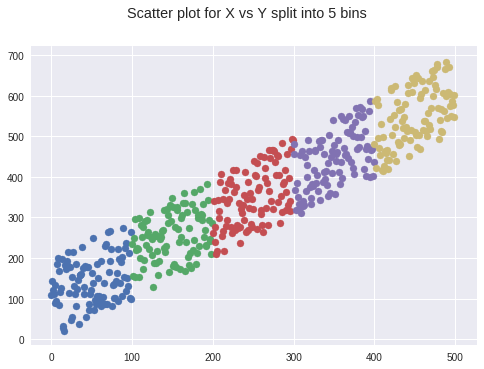

In [138]:
plt.figure()
plt.suptitle("Scatter plot for X vs Y split into 5 bins")
for i in range(BINS):
  start = STEP * i 
  stop = STEP * (i+1)
  x = df.iloc[start:stop, 0]
  y = df.iloc[start:stop, 1]
  
  plt.scatter(x,y)

## Split data into 5 bins

In [139]:
COLS = ['bin_' + str(x) for x in range(BINS)]
df2 = pd.DataFrame(columns=COLS)

for i in range(BINS):
  start = STEP * i 
  stop = STEP * (i+1)
  label = 'bin_' + str(i)
  print("label,start,stop:", label,start,stop)
  x = df.iloc[start:stop]['X']
  y = df.iloc[start:stop]['Y']

  df2[label] = list(y)
  
print("---")
print(df2.head())

label,start,stop: bin_0 0 100
label,start,stop: bin_1 100 200
label,start,stop: bin_2 200 300
label,start,stop: bin_3 300 400
label,start,stop: bin_4 400 500
---
    bin_0   bin_1   bin_2   bin_3   bin_4
0  109.76  235.56  262.36  481.31  480.25
1  144.04  155.00  340.27  455.81  586.86
2  122.55  249.04  277.55  368.63  421.92
3  111.98  295.44  238.92  319.22  592.06
4   88.73  153.75  208.94  385.45  577.90


## Box plot of each bin


In the boxplot below, the box extends from the lower to upper quartile values of the data, with a line at the median.
 The whiskers extend from the box to show the range of the data. The triangle indicates the mean value.



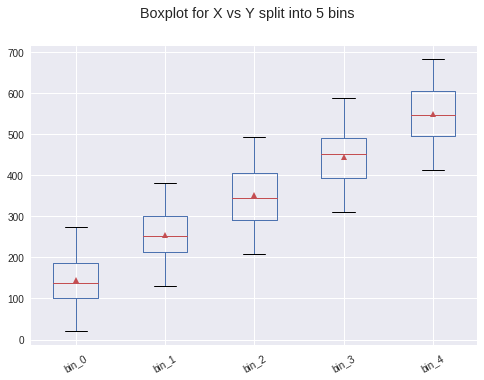

In [140]:
plt.figure()
plt.suptitle("Boxplot for X vs Y split into 5 bins")
ax = plt.gca()

df2.boxplot(showmeans=True)
# Rotate x axis text values
for tick in ax.get_xticklabels():
    tick.set_rotation(30)

print("\nIn the boxplot below, the box extends from the lower to upper quartile values of the data, with a line at the median.\n \
The whiskers extend from the box to show the range of the data. The triangle indicates the mean value.\n")